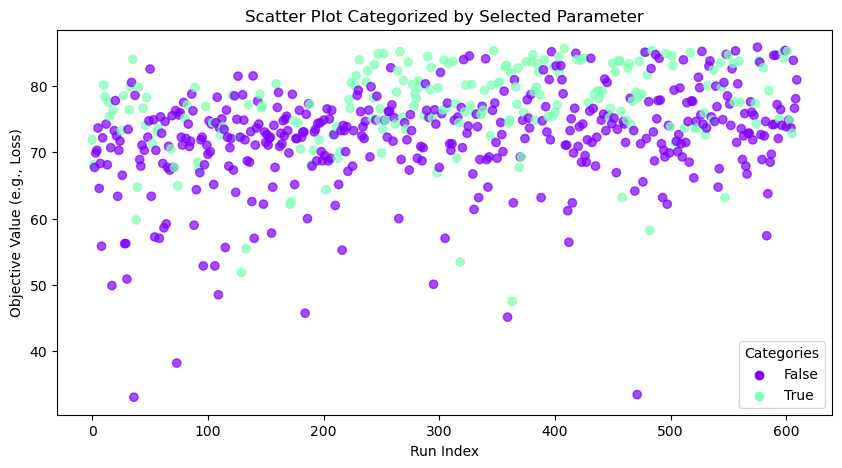

In [28]:
import matplotlib.pyplot as plt
import json

# Load the history data
history = json.load(open('history copy.json'))

# Extract the fs (e.g., loss or accuracy values)
fs = history['fs']
params = history['params']

# Choose the key to categorize by (either 'batch_size' or 'optimizer name')
# For example, categorizing by batch_size:
categories = [param['batch_size'] for param in params]
categories = [param['use_bn'] for param in params]
categories = [param['dropout_rate'] for param in params]
categories = [", ".join(map(str, param['hl_sizes'])) for param in params]
categories = [param['optimizer']['name'] for param in params]
categories = [param['optimizer'].get('nesterov', False) for param in params]

# Alternatively, to categorize by optimizer name:
# categories = [param['optimizer']['name'] for param in params]

# Create a color map for the unique categories
unique_categories = set(categories)
colors = plt.cm.rainbow([i / len(unique_categories) for i in range(len(unique_categories))])
color_map = {cat: colors[i] for i, cat in enumerate(unique_categories)}

# Prepare colors for each point based on the selected category
point_colors = [color_map[cat] for cat in categories]

# Create the scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(x=list(range(len(fs))), y=fs, c=point_colors, marker='o', alpha=0.7)

# Add a legend
for cat, color in color_map.items():
    plt.scatter([], [], c=[color], label=f'{cat}', marker='o')  # Create a dummy plot for legend
plt.legend(title='Categories')

# Show the plot
plt.xlabel('Run Index')
plt.ylabel('Objective Value (e.g., Loss)')
plt.title('Scatter Plot Categorized by Selected Parameter')
plt.show()


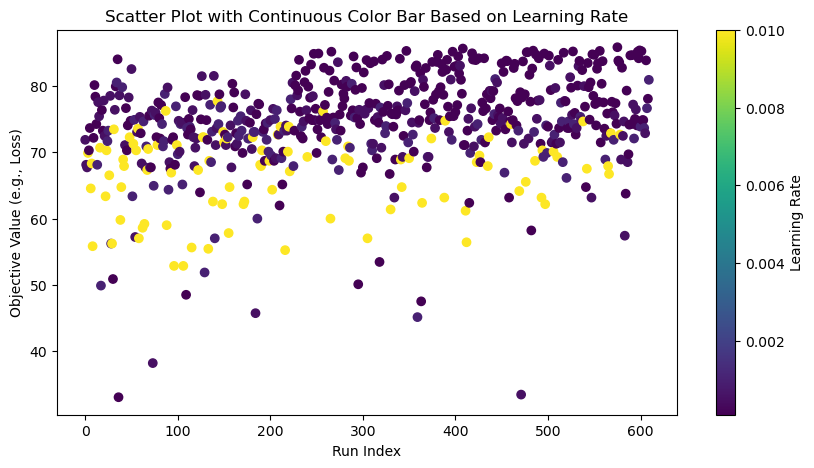

In [27]:
import matplotlib.pyplot as plt
import json
import numpy as np

# Load the history data
history = json.load(open('history copy.json'))

# Extract the fs (e.g., loss or accuracy values)
fs = history['fs']
params = history['params']

# Select a continuous variable to categorize (e.g., learning rate)
# We'll categorize based on optimizer's learning rate
categories = np.array([param['optimizer']['lr'] for param in params])
categories = np.array([param['optimizer'].get('weight_decay', -1.0) for param in params])

# Create a scatter plot with a colormap
plt.figure(figsize=(10, 5))

# Use a continuous colormap (e.g., 'viridis' or 'plasma')
scatter = plt.scatter(x=list(range(len(fs))), y=fs, c=categories, cmap='viridis', marker='o', label='loss')

# Add a color bar to represent the continuous values (learning rate)
cbar = plt.colorbar(scatter)
cbar.set_label('Learning Rate')

# Show the plot
plt.xlabel('Run Index')
plt.ylabel('Objective Value (e.g., Loss)')
plt.title('Scatter Plot with Continuous Color Bar Based on Learning Rate')
plt.show()


In [29]:
# find the index of the max fs
max_index = np.argmax(fs)
max_fs = fs[max_index]

# print the best parameters
print('Best Parameters:')
for key, value in params[max_index].items():
    print(f'  {key}: {value}')

# print the best fs
print(f'Best fs: {max_fs}')

Best Parameters:
  epochs: 200
  batch_size: 128
  optimizer: {'name': 'SGD', 'lr': 0.010793033310635212, 'momentum': 0.8047999511195054, 'nesterov': False, 'weight_decay': 0.0001}
  hl_sizes: [256, 256, 256, 256]
  use_bn: True
  dropout_rate: 0.0
Best fs: 85.84472732987584
